## Problem Statement
An online retail store is trying to understand the various customer purchase patterns for their firm, you are required to give enough evidence based insights to provide the same.

## Project Objective 
1. Using the above data, find useful insights about the customer purchasing history
that can be an added advantage for the online retailer.
2. Segment the customers based on their purchasing behavior.


Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore') 

In [2]:
data = pd.read_csv(r'C:/Users/Astha/Downloads/Project/OnlineRetail.csv',encoding= 'unicode_escape')

In [3]:
data.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
111791,545830,22844,VINTAGE CREAM DOG FOOD CONTAINER,1,3/7/2011 13:10,8.50,17634.0,United Kingdom
51715,540672,22974,CHILDRENS DOLLY GIRL MUG,12,1/10/2011 15:51,1.65,15281.0,United Kingdom
26009,538449,22374,AIRLINE BAG VINTAGE JET SET RED,1,12/12/2010 12:24,4.25,17085.0,United Kingdom
332043,566054,20726,LUNCH BAG WOODLAND,20,9/8/2011 15:04,1.65,12592.0,Germany
479768,577179,21523,DOORMAT FANCY FONT HOME SWEET HOME,4,11/18/2011 11:20,8.25,18061.0,United Kingdom


In [4]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
data.loc[(data['CustomerID']== 12346.0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/2011 10:01,1.04,12346.0,United Kingdom
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,1/18/2011 10:17,1.04,12346.0,United Kingdom


As seen stockcode have endings with A,B,G,E 

## Data Description
The dataset has 541909 records and 8 features. The dataset contains price per unit and quantity of items sold. 
Stock code is the product Id to identify what products have been sold.

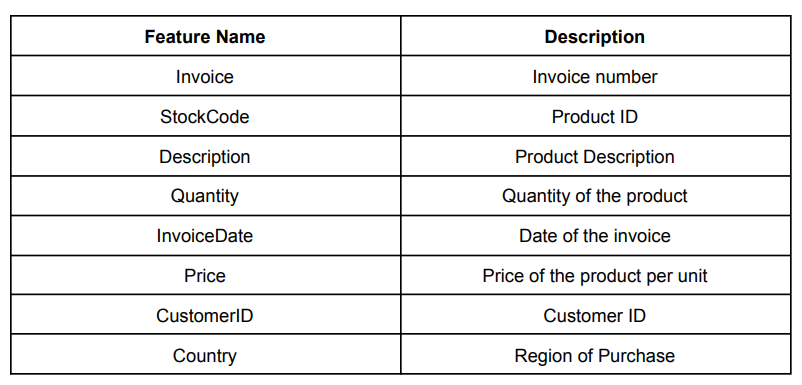

In [6]:
data.shape

(541909, 8)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [8]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


## Data Pre-processing

In [9]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Almost about 25% don't have customerID and with the data available we can't impute missing customerID. Hence dropping those values. In addition, we have to focus on customer segmentation and not product segmentation 

In [10]:
data.dropna(axis = 0, subset = ['CustomerID'], inplace = True)
print('Dataframe dimensions:', data.shape)

Dataframe dimensions: (406829, 8)


In [11]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## Exploratory Data Analysis

<AxesSubplot:>

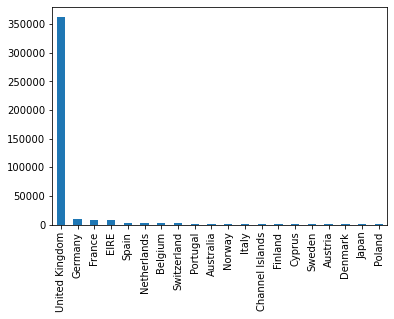

In [12]:
data.Country.value_counts()[:20].plot(kind='bar') 


As seen from the bar chart most of the data is from United Kingdom.

In [13]:
from wordcloud import WordCloud, STOPWORDS
text = " ".join(review for review in data.Description)

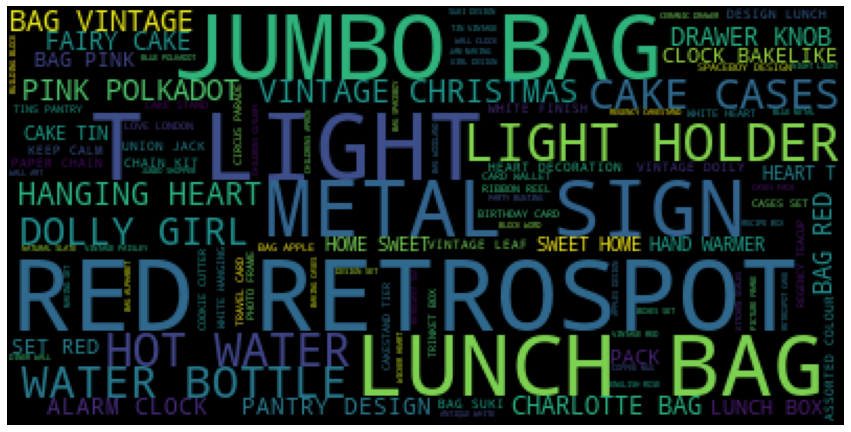

In [14]:
wordcloud2 = WordCloud().generate(text)
# Generate plot
fig = plt.figure(1, figsize=(15, 15))
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

In [15]:
from datetime import datetime
data['InvoiceDate']= pd.to_datetime(data['InvoiceDate'])
 

In [16]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


The RFM (Recency,Frequency,Monetary value) based model of customer value for finding the customer segments.

Basket Price

In [17]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
#create a separate df with C onvoice no.

In [18]:
data['Revenue'] = data['UnitPrice'] * data['Quantity']
data.loc[(data['CustomerID']== 12346.0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,77183.6
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom,-77183.6


In [19]:
basket_price = data.groupby('CustomerID')['Revenue'].sum().reset_index()

basket_price.head()

,CustomerID,Revenue
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [20]:
top_10 = basket_price.sort_values('Revenue', ascending=False).head(10)

In [21]:
top_10['CustomerID'] =top_10['CustomerID'].astype(int)

<AxesSubplot:xlabel='CustomerID'>

<Figure size 1080x1080 with 0 Axes>

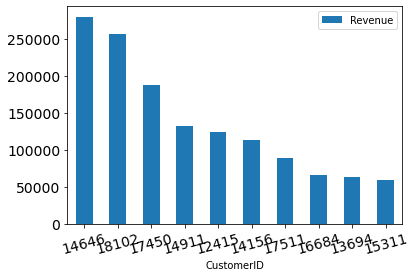

In [22]:
fig = plt.figure(1, figsize=(15, 15))
top_10.plot(x="CustomerID", y="Revenue", kind="bar", rot=15, fontsize=14)

The above bar chart shows the top 10 customer Id by sales revenue.

In [23]:
##1. Top 10 products bought by customers.Doubt
#top_10_pr = data.groupby(['Description','CustomerID'])['Quantity'].sum().plot(kind='bar')
#2.Total transactions canceled by product. Top five canceled product list will make sense.
#3.Wordcloud using product description to see which are being sold  and the highest revenue. 

SyntaxError: invalid syntax (3535906914.py, line 1)

In [32]:
##1. Top 10 products bought by customers.Doubt
top_10_pr = data.groupby(['CustomerID','Description'])['Quantity'].sum()


In [35]:
top_10_pr.value_counts(sort = True, ascending = False).head(10)


12    38938
1     36630
2     33332
6     24624
4     20877
24    17672
3     17091
10    10326
8      8829
5      6556
Name: Quantity, dtype: int64

In [44]:
top = data.groupby(['Description', 'CustomerID']).agg({'Quantity': 'sum'}).sort_values('Quantity', ascending=False).head(10)

In [45]:
top

,,Quantity
Description,CustomerID,
ASSTD DESIGN 3D PAPER STICKERS,13256.0,12540
WORLD WAR 2 GLIDERS ASSTD DESIGNS,16333.0,10080
BROCADE RING PURSE,16422.0,10077
POPCORN HOLDER,17949.0,9292
RED HARMONICA IN BOX,16333.0,8120
SMALL CHINESE STYLE SCISSOR,16308.0,8000
PACK OF 12 LONDON TISSUES,17306.0,6624
CREAM HEART CARD HOLDER,18102.0,5946
WORLD WAR 2 GLIDERS ASSTD DESIGNS,12901.0,5712


<AxesSubplot:ylabel='Description,CustomerID'>

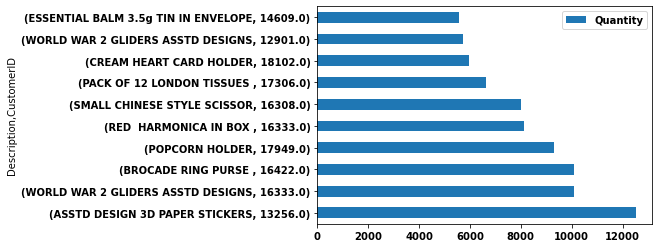

In [51]:
top.plot(kind='barh')

In [49]:
#x = top['Description']
#y = top['Quantity']
sns.barplot(x = top.index,y = top['Quantity'],data = top)

NotImplementedError: isna is not defined for MultiIndex

In [24]:
data.Country.value_counts().reset_index()[:10]

,index,Country
0,United Kingdom,361878
1,Germany,9495
2,France,8491
3,EIRE,7485
4,Spain,2533
5,Netherlands,2371
6,Belgium,2069
7,Switzerland,1877
8,Portugal,1480
9,Australia,1259


In [25]:
x = data.Country.apply(lambda x: x if x == 'United Kingdom' else 'Not UK').value_counts().rename('#Customers') #Bar chart
y = (x/data .shape[0]).rename('%Customers')
pd.concat([x, y], axis= 1)

,#Customers,%Customers
United Kingdom,361878,0.889509
Not UK,44951,0.110491


In order to have a global view of the type of order performed in this dataset, 
I determine how the purchases are divided according to total prizes:

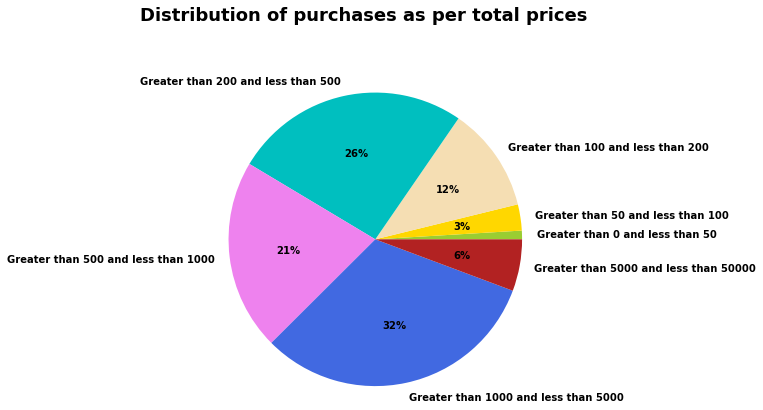

In [26]:
price_range = [0, 50, 100, 200, 500, 1000, 5000, 50000]
count_price = []
for i, price in enumerate(price_range):
    if i == 0: continue
    val = basket_price[(basket_price['Revenue'] < price) &
                       (basket_price['Revenue'] > price_range[i-1])]['Revenue'].count()
    count_price.append(val)
plt.rc('font', weight='bold')
f, ax = plt.subplots(figsize=(11, 6))
colors = ['yellowgreen', 'gold', 'wheat', 'c', 'violet', 'royalblue','firebrick']
labels = [ 'Greater than {} and less than {}'.format(price_range[i-1], s) for i,s in enumerate(price_range) if i != 0]
sizes  = count_price
explode = [0.0 if sizes[i] < 100 else 0.0 for i in range(len(sizes))]
ax.pie(sizes, explode = explode, labels=labels, colors = colors,
       autopct = lambda x:'{:1.0f}%'.format(x) if x > 1 else '',
       shadow = False, startangle=0)
ax.axis('equal')
f.text(0.5, 1.01, "Distribution of purchases as per total prices", ha='center', fontsize = 18);

Customer segmentation is the process of dividing an organization’s customer bases into different sections or segments based on various customer attributes. 
The process of customer segmentation is based on the premise of finding differences among the customers’ behavior and patterns.

The major objectives and benefits behind the motivation for customer segmentation are:

Higher Revenue: This is the most obvious requirement of any customer segmentation project.
    
Customer Understanding: One of the mostly widely accepted business paradigms is “know your customer” and 
a segmentation of the customer base allows for a perfect dissection of this paradigm.

Target Marketing: The most visible reason for customer segmentation is the ability to focus marketing efforts effectively and efficiently. If a firm knows the different segments of its customer base, 
it can devise better marketing campaigns which are tailor made for the segment.
A good segmentation model allows for better understanding of customer requirements and hence increases the chances of the success of any marketing campaign developed by the organization.

Optimal Product Placement: A good customer segmentation strategy can also help the firm with developing or offering new products, or a bundle of products together as a combined offering.
    
Finding Latent Customer Segments: Finding out which segment of customers it might be missing to identifying untapped customer segments by focused on marketing campaigns or new business development.

Source : https://www.kaggle.com/code/mgmarques/customer-segmentation-and-market-basket-analysis

## Modeling 

Create the RFM model (Recency, Frequency,Monetary value)

Recency

In [ ]:
max_date = max(data['InvoiceDate'])
print(max_date)

In [ ]:
import datetime

In [ ]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'],format='%d-%m-%Y %H:%M')

In [ ]:
data['Diff'] = max_date - data['InvoiceDate']
data.head()

In [ ]:
rfm_r = data.groupby('CustomerID')['Diff'].min().reset_index()
rfm_r

In [ ]:
import datetime as dt

In [ ]:
rfm_r['Diff'] = rfm_r['Diff'].dt.days
rfm_r

In [ ]:
rfm_r.info()

In [ ]:
rfm_r['CustomerID'] = rfm_r['CustomerID'].astype(str)

Distribution of customer recency

In [ ]:
import math
import scipy.stats as stats
import scipy
x=rfm_r.Diff
mu=np.mean(x)
sigma=math.sqrt(np.var(x))
n,bins,patches=plt.hist(x,1000,facecolor='blue',alpha=0.75)#alpha=transparency parameter

y=scipy.stats.norm.pdf(bins,mu,sigma)
l=plt.plot(bins,y,'r--',lw=2)
plt.xlabel('Recency in days')
plt.ylabel('Number of transactions')
plt.title('Sales Recency')
plt.grid(True)
plt.show()

Customer Frequency

In [ ]:
rfm_f = data.groupby('CustomerID')['InvoiceNo'].count().reset_index()
rfm_f = rfm_f.rename(columns = {'InvoiceNo':'Frequency'})
rfm_f

In [ ]:
rfm_r['CustomerID'] = rfm_r['CustomerID'].astype(str)

In [ ]:
rfm = pd.merge(basket_price,rfm_f,on='CustomerID',how='inner')
rfm.head()

In [ ]:
rfm['CustomerID'] = rfm['CustomerID'].astype(str)

In [ ]:
rfm_r.info()

In [ ]:
customer_history_df= pd.merge(rfm,rfm_r,on='CustomerID',how='inner')
customer_history_df= customer_history_df.rename(columns = {'Basket Price':'Revenue','Diff' :'Recency'})

customer_history_df.head()


In [ ]:
customer_history_df.shape

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
attr = ['Revenue','Frequency','Recency']
sns.boxplot(data=customer_history_df[attr])
plt.figure(figsize=(20,10))

In [ ]:
customer_history_df.describe()

In [ ]:
attr = ['Revenue','Frequency','Recency']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data=customer_history_df[attr])
plt.figure(figsize=(10,5))

In [ ]:
customer_history_df.describe()

Dealing with outliers

In [ ]:
Q1 = customer_history_df.Revenue.quantile(0.25)
Q3 = customer_history_df.Revenue.quantile(0.75)
IQR = Q3-Q1
IQR
customer_history_df = customer_history_df[(customer_history_df.Revenue >= Q1 - 1.5*IQR) & (customer_history_df.Revenue <= Q3 + 1.5*IQR)]

Q1 = customer_history_df.Frequency.quantile(0.25)
Q3 = customer_history_df.Frequency.quantile(0.75)
IQR = Q3-Q1
customer_history_df = customer_history_df[(customer_history_df.Frequency >= Q1 - 1.5*IQR) & (customer_history_df.Frequency <= Q3 + 1.5*IQR)]

Q1 = customer_history_df.Recency.quantile(0.25)
Q3 = customer_history_df.Recency.quantile(0.75)
IQR = Q3-Q1
customer_history_df = customer_history_df[(customer_history_df.Recency >= Q1 - 1.5*IQR) & (customer_history_df.Recency <= Q3 + 1.5*IQR)]

In [ ]:
customer_history_df = customer_history_df.reset_index(drop = True)

In [ ]:
customer_history_df.head()

In [ ]:
attr = ['Revenue','Frequency','Recency']
sns.boxplot(data=customer_history_df[attr])
plt.figure(figsize=(10,5))

## Choosing an algorithm

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
customer_history_df.shape

In [ ]:
customer_history_1 = customer_history_df[['Revenue','Frequency','Recency']]
customer_history_1

In [ ]:
import math
from sklearn import preprocessing
feature_vector=['Revenue','Frequency','Recency']
X=customer_history_1[feature_vector].values
scaler=preprocessing.StandardScaler()
X_scaled=scaler.fit_transform(X)

In [ ]:
X_scaled

In [ ]:
X_scaled= pd.DataFrame(X_scaled)
X_scaled

In [ ]:
X_scaled.columns = ['Revenue','Frequency','Recency']
X_scaled

## Model Evaluation and Techniques
1. Elbow Method

A fundamental step for any unsupervised algorithm is to determine the optimal number of clusters into which the data may be clustered. The Elbow Method is one of the most popular methods to determine this optimal value of k.

2. Silhouette Analysis

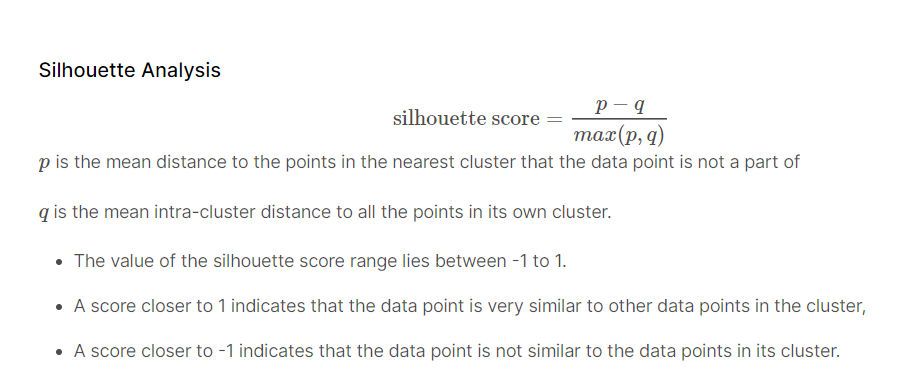



Elbow method to calculate optimal number of clusters.

In [ ]:
from sklearn.cluster import KMeans
ssd =[]
for i in range(2,9):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X_scaled)
    ssd.append(kmeans.inertia_)
plt.plot(ssd)

In [ ]:
plt.scatter(X_scaled.Recency,X_scaled.Revenue,alpha=0.5) # historgram 

In [ ]:
plt.scatter(X_scaled.Frequency,X_scaled.Revenue,alpha=0.5)

In [ ]:
x=X_scaled.Revenue
n,bins,patches=plt.hist(x,1000,facecolor='b',alpha=1)
plt.xlabel('Sales Revenue')
plt.ylabel('Probability')
plt.title('Histogram of monetary value ')
plt.grid(True)
plt.show()

Clustering for Customer segements by using KMeans Custering algorithm.

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []
for num_clusters in range_n_clusters:
 
 # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(X_scaled)
    cluster_labels = kmeans.labels_
 
 # silhouette score
    silhouette_avg.append(silhouette_score(X_scaled, cluster_labels))
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

In [ ]:
# Silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(X_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

In [ ]:
kmeans = KMeans(n_clusters=7)
kmeans.fit(X_scaled)
kmeans.labels_

In [ ]:
log_data = customer_history_df

In [ ]:
log_data['Cluster_id'] = kmeans.labels_
log_data.head()

In [ ]:
counts_1 = log_data.groupby('Cluster_id')['Revenue'].count()
counts_1

In [ ]:
sns.boxplot(x='Cluster_id',y='Revenue',data=log_data)

In [ ]:
sns.boxplot(x='Cluster_id',y='Frequency',data=log_data)

In [ ]:
import plotly as py
import plotly.graph_objs as go
py.offline.init_notebook_mode()

x_data=['Cluster 1','Cluster 2','Cluster 3','Cluster 4','Cluster 5','Cluster 6','Cluster 7']
cutoff_quantile=100
field_to_plot='Recency'
y0 = log_data[log_data['Cluster_id']==0][field_to_plot].values
y0 = y0[y0<np.percentile(y0, cutoff_quantile)]
y1=log_data[log_data['Cluster_id']==1][field_to_plot].values
y1=y1[y1<np.percentile(y1,cutoff_quantile)]
y2 = log_data[log_data['Cluster_id']==2][field_to_plot].values
y2 = y2[y2<np.percentile(y2, cutoff_quantile)]
y3 = log_data[log_data['Cluster_id']==3][field_to_plot].values
y3 = y3[y3<np.percentile(y3, cutoff_quantile)]
y4 = log_data[log_data['Cluster_id']==4][field_to_plot].values
y4 = y4[y4<np.percentile(y4, cutoff_quantile)]
y5 = log_data[log_data['Cluster_id']==5][field_to_plot].values
y5 = y5[y5<np.percentile(y5, cutoff_quantile)]
y6 = log_data[log_data['Cluster_id']==6][field_to_plot].values
y6 = y6[y6<np.percentile(y6, cutoff_quantile)]
y_data=[y0,y1,y2,y3,y4,y5,y6]

colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)', 'rgba(44, 100, 14, 0.5)', 'rgba(255, 65, 54, 0.5)',
          'rgba(207, 114, 255, 0.5)', 'rgba(127, 96, 0, 0.5)','rgba(127, 30, 0, 0.5)','rgba(138, 96, 49, 0.5)']
traces=[]

for xd,yd,cls in zip(x_data,y_data,colors):
    traces.append(go.Box(y=yd,
                         name=xd,
                         boxpoints=False,
                         jitter=0.5,
                         whiskerwidth=0.2,
                         fillcolor=cls,
                         marker=dict(size=2,),
                         line=dict(width=1),
                        ))
layout=go.Layout(
title=' Sales {} from cluster to cluster'.format(field_to_plot),
yaxis=dict(autorange=True,
           showgrid=True,
           zeroline=True,
           dtick=50,
           gridcolor='rgb(255, 255, 255)',
           gridwidth=0.1,
           zerolinecolor='rgb(255,255,255)',
           zerolinewidth=2,),
margin=dict(
    l=40,
    r=30,
    b=80,
    t=100,
),
paper_bgcolor='rgb(243, 243, 243)',
plot_bgcolor='rgb(243, 243, 243)',
showlegend=False
)
fig=go.Figure(data=traces,layout=layout)
py.offline.iplot(fig)

In [ ]:
import plotly as py
import plotly.graph_objs as go
py.offline.init_notebook_mode()

x_data=['Cluster 1','Cluster 2','Cluster 3','Cluster 4','Cluster 5','Cluster 6','Cluster 7']
cutoff_quantile=90
field_to_plot='Frequency'
y0 = log_data[log_data['Cluster_id']==0][field_to_plot].values
y0 = y0[y0<np.percentile(y0, cutoff_quantile)]
y1=log_data[log_data['Cluster_id']==1][field_to_plot].values
y1=y1[y1<np.percentile(y1,cutoff_quantile)]
y2 = log_data[log_data['Cluster_id']==2][field_to_plot].values
y2 = y2[y2<np.percentile(y2, cutoff_quantile)]
y3 = log_data[log_data['Cluster_id']==3][field_to_plot].values
y3 = y3[y3<np.percentile(y3, cutoff_quantile)]
y4 = log_data[log_data['Cluster_id']==4][field_to_plot].values
y4 = y4[y4<np.percentile(y4, cutoff_quantile)]
y5 = log_data[log_data['Cluster_id']==5][field_to_plot].values
y5 = y5[y5<np.percentile(y5, cutoff_quantile)]
y6 = log_data[log_data['Cluster_id']==6][field_to_plot].values
y6 = y6[y6<np.percentile(y6, cutoff_quantile)]
y_data=[y0,y1,y2,y3,y4,y5,y6]

colors.append(go.Box(y=yd,
                         name=xd,
                         boxpoints=False,
                         jitter=0.5,
                         whiskerwidth=0.2,
                         fillcolor=cls,
                         marker=dict(size=2,),
                         line=dict(width=1),
                        ))
layout=go.Layout(
title=' Sales {} from cluster to cluster'.format(field_to_plot),
yaxis=dict(autorange=True,
           showgrid=True,
           zeroline=True,
           dtick=50,
           gridcolor='rgb(255, 255, 255)',
           gridwidth=0.1,
           zerolinecolor='rgb(255,255,255)',
           zerolinewidth=2,),
margin=dict(
    l=40,
    r=30,
    b=80,
    t=100,
),
paper_bgcolor='rgb(243, 243, 243)',
plot_bgcolor='rgb(243, 243, 243)',
showlegend=False
)
fig=go.Figure(data=traces,layout=layout)
py.offline.iplot(fig)

In [ ]:
x_data = ['Cluster 1','Cluster 2','Cluster 3','Cluster 4', 'Cluster 5','Cluster 6','Cluster 7']
cutoff_quantile = 80
field_to_plot = 'Revenue'
y0 = log_data[log_data['Cluster_id']==0][field_to_plot].values
y0 = y0[y0<np.percentile(y0, cutoff_quantile)]
y1 = log_data[log_data['Cluster_id']==1][field_to_plot].values
y1 = y1[y1<np.percentile(y1, cutoff_quantile)]
y2 = log_data[log_data['Cluster_id']==2][field_to_plot].values
y2 = y2[y2<np.percentile(y2, cutoff_quantile)]
y3 = log_data[log_data['Cluster_id']==3][field_to_plot].values
y3 = y3[y3<np.percentile(y3, cutoff_quantile)]
y4 = log_data[log_data['Cluster_id']==4][field_to_plot].values
y4 = y4[y4<np.percentile(y4, cutoff_quantile)]
y5 = log_data[log_data['Cluster_id']==5][field_to_plot].values
y5 = y5[y5<np.percentile(y5, cutoff_quantile)]
y6 = log_data[log_data['Cluster_id']==6][field_to_plot].values
y6 = y6[y6<np.percentile(y6, cutoff_quantile)]
y_data = [y0,y1,y2,y3,y4,y5,y6]

colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)', 'rgba(44, 160, 101, 0.5)', 'rgba(255, 65, 54, 0.5)', 
          'rgba(207, 114, 255, 0.5)', 'rgba(127, 96, 0, 0.5)','rgba(127, 30, 0, 0.5)','rgba(138, 96, 49, 0.5)']
traces = []

for xd, yd, cls in zip(x_data, y_data, colors):
        traces.append(go.Box(
            y=yd,
            name=xd,
            boxpoints=False,
            jitter=0.5,
            whiskerwidth=0.2,
            fillcolor=cls,
            marker=dict(
                size=2,
            ),
            line=dict(width=1),
        ))

layout = go.Layout(
    title='Sales {} from cluster to cluster'.format(field_to_plot),
    yaxis=dict(
        autorange=True,
        showgrid=True,
        zeroline=True,
        dtick=1000,
        gridcolor='black',
        gridwidth=0.1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2,
    ),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    paper_bgcolor='white',
    plot_bgcolor='white',
    showlegend=False
)

fig = go.Figure(data=traces, layout=layout)
py.offline.iplot(fig)

Hierarchical Clustering
Hierarchical clustering involves creating clusters that have a predetermined ordering from top to bottom. For example, all files and folders on the hard disk are organized in a hierarchy. There are two types of hierarchical clustering,

1.Divisive

2.Agglomerative.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [ ]:
# Single linkage: 

mergings = linkage(X_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

In [ ]:
# Complete linkage

mergings = linkage(X_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [ ]:
# Average linkage

mergings = linkage(X_scaled, method="average", metric='euclidean')
dendrogram(mergings)
plt.show()

In [ ]:
cluster_labels = cut_tree(mergings, n_clusters=7).reshape(-1, )
cluster_labels

In [ ]:
log_data['Cluster_Labels'] = cluster_labels
log_data.head()

In [ ]:
# Plot Cluster label vs Amount

sns.boxplot(x='Cluster_Labels', y='Revenue', data=log_data)


sns.boxplot(x='Cluster_Labels', y='Frequency', data=log_data)

In [ ]:

sns.boxplot(x='Cluster_Labels', y='Recency', data=log_data)

## Inferences


K-Means Clustering with 7 Cluster Ids

Customers with Cluster Id 6 are the customers with high amount of transactions as compared to other customers.
Customers with Cluster Id 4 are frequent buyers.
Customers with Cluster Id 4 are not recent buyers and hence least of importance from business point of view.

Hierarchical Clustering with 7 Cluster Labels

Customers with Cluster_Labels 1 and 2 are the customers with high amount of transactions as compared to other customers.
Customers with Cluster_Labels 2 are frequent buyers.
Customers with Cluster_Labels 0 are not recent buyers and hence least of importance from business point of view.

## Future possibilities of the project

There are various extensions of RFM model. We can do scoring as well to group them into Top, middle and Low levels.
These levels would make marketing and promotional offers addressing the purchasing behavior of a particular level. 